In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

from PIL import Image, ImageDraw, ImageFont

In [2]:
train_dir = r'C:\Users\Dennis\Desktop\DL0320EN\train'
validation_dir = r'C:\Users\Dennis\Desktop\DL0320EN\valid'
test_dir =r'C:\Users\Dennis\Desktop\DL0320EN\test'

In [3]:
cl = ['5', '10', '20', '50', '100', '200', '500']

In [4]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0
        )

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0
        )




Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [5]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
conv_base.trainable = False

In [8]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(7,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 7)                 175623    
Total params: 14,890,311
Trainable params: 175,623
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
checkpoint = ModelCheckpoint("vgg16.h5",monitor='val_loss',verbose=1,save_best_only=True)

In [12]:
early = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1)

In [13]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=5,epochs=20,verbose=1,
                             validation_data=validation_generator,validation_steps=5,callbacks=[checkpoint,early])

Epoch 1/20
4/5 [=======================>......] - ETA: 8s - loss: 2.9892 - accuracy: 0.2000   
Epoch 00001: val_loss improved from inf to 1.51030, saving model to vgg16.h5
5/5 [==============================] - 52s 10s/step - loss: 3.0568 - accuracy: 0.2400 - val_loss: 1.5103 - val_accuracy: 0.6800
Epoch 2/20
4/5 [=======================>......] - ETA: 7s - loss: 1.4640 - accuracy: 0.4500 
Epoch 00002: val_loss did not improve from 1.51030
5/5 [==============================] - 49s 10s/step - loss: 1.3024 - accuracy: 0.4800 - val_loss: 1.7326 - val_accuracy: 0.5200
Epoch 3/20
4/5 [=======================>......] - ETA: 8s - loss: 0.8421 - accuracy: 0.7500 
Epoch 00003: val_loss improved from 1.51030 to 0.70885, saving model to vgg16.h5
5/5 [==============================] - 55s 11s/step - loss: 0.6908 - accuracy: 0.8000 - val_loss: 0.7089 - val_accuracy: 0.7200
Epoch 4/20
4/5 [=======================>......] - ETA: 8s - loss: 0.3370 - accuracy: 0.9000 
Epoch 00004: val_loss did not imp

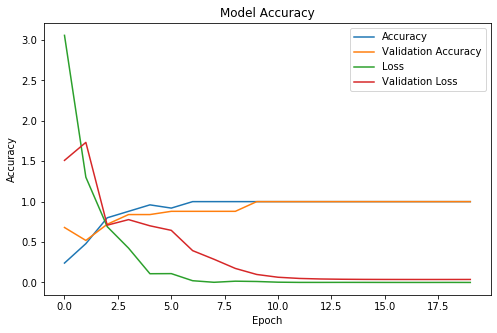

In [14]:
#Plot Graph to see the result
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [15]:
#Save the model
#model.save('vgg16.h5')

### Model Evaluation

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0,
        shuffle=False)

Found 70 images belonging to 7 classes.


In [17]:
len(test_generator)

14

In [18]:
vgg = model

In [19]:
vggscore = vgg.evaluate_generator(test_generator,steps=14,verbose=1)

14/14 [==============================] - 34s 2s/step - loss: 0.0339 - accuracy: 0.9857


In [20]:
vggscore

[0.033865525072282514, 0.98571426]

In [21]:
vgg.metrics_names

['loss', 'accuracy']

In [23]:
print("Accuracy for VGG16 is %.2f%%" % (vggscore[1]*100))

Accuracy for VGG16 is 98.57%


### Model Prediction

In [24]:
vgg_predict = vgg.predict_generator(generator=test_generator,steps=14,verbose=1)

14/14 [==============================] - 33s 2s/step


In [25]:
vgg_predict

array([[9.99688983e-01, 5.46045840e-07, 2.54093960e-04, 3.57778918e-05,
        1.08463000e-05, 3.98187422e-06, 5.88336979e-06],
       [9.99882221e-01, 1.29517119e-07, 2.76568935e-05, 3.08525978e-06,
        8.29564015e-05, 1.70666215e-06, 2.21019900e-06],
       [9.99681234e-01, 1.62556216e-06, 1.07408472e-04, 3.26781992e-05,
        1.60740849e-04, 7.98541078e-06, 8.31320358e-06],
       [9.99608815e-01, 1.12046018e-06, 6.43892126e-05, 3.83425104e-05,
        2.73294107e-04, 5.29512545e-06, 8.99218958e-06],
       [9.98019218e-01, 9.46349246e-07, 1.71628722e-03, 1.46655526e-04,
        4.19338066e-05, 1.65604615e-05, 5.84521476e-05],
       [9.99896765e-01, 3.94855491e-08, 3.55918055e-05, 7.62175296e-06,
        5.80431297e-05, 5.36130187e-07, 1.46518198e-06],
       [9.99969840e-01, 1.60586723e-07, 1.46780740e-05, 2.75486855e-06,
        9.57524480e-06, 1.04139679e-06, 1.97233567e-06],
       [9.99009013e-01, 1.69040516e-06, 3.26546229e-04, 3.49483198e-05,
        5.75131213e-04, 2

In [26]:
len(vgg_predict)

70

In [27]:
predicted_class_indices = np.argmax(vgg_predict,axis=1)
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 6, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6], dtype=int64)

In [28]:
labels = (test_generator.class_indices)
labels

{'5': 0, '10': 1, '20': 2, '50': 3, '100': 4, '200': 5, '500': 6}

In [29]:
labels = dict((v,k) for k,v in labels.items())
labels

{0: '5', 1: '10', 2: '20', 3: '50', 4: '100', 5: '200', 6: '500'}

In [30]:
predictions = [labels[k] for k in predicted_class_indices]
predictions

['5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '50',
 '50',
 '50',
 '50',
 '50',
 '50',
 '50',
 '50',
 '50',
 '50',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100',
 '500',
 '100',
 '100',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '500',
 '500',
 '500',
 '500',
 '500',
 '500',
 '500',
 '500',
 '500',
 '500']

In [31]:
print(predicted_class_indices[0:5])

[0 0 0 0 0]


In [32]:
print(labels)

{0: '5', 1: '10', 2: '20', 3: '50', 4: '100', 5: '200', 6: '500'}


In [33]:
for n in predictions[0:5]:
    print(n)

5
5
5
5
5


In [35]:
#The first 5 predictions are 5 euros

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).